****Alucar - Analisando as vendas****

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [13]:
chocolura = pd.read_csv('./data/chocolura.csv', sep=',')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [14]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [15]:
print("Quantidade de linhas e coluna: {}".format(chocolura.shape))
print("Quantidade de dados nulos: {}".format(chocolura.isna().sum().sum()))

Quantidade de linhas e coluna: (24, 2)
Quantidade de dados nulos: 0


In [16]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Aumento e aceleração do número de assinantes**

In [18]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [19]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

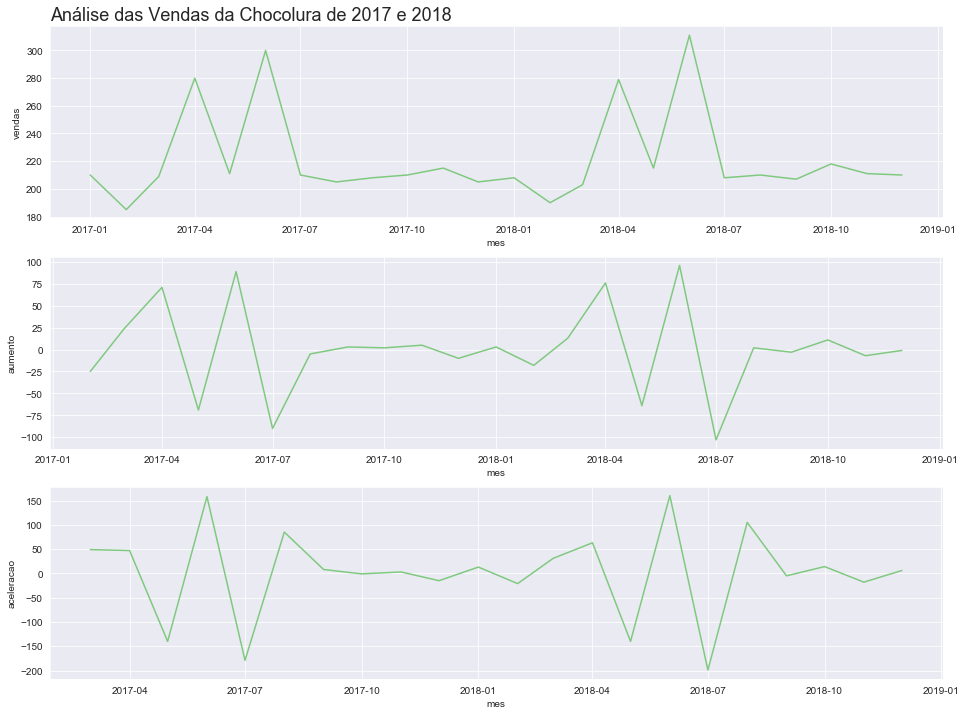

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise das Vendas da Chocolura de 2017 e 2018')
